# CHAPTER 1 Fundamentals
## 1.1 Basic Programming Model
Example of binary search:

In [1]:
def rank(key, a):
    '''
    Core function of binary search.
    Array must be sorted.
    '''
    lo = 0
    hi = len(a) - 1;
    while lo <= hi:
        mid = lo + (hi - lo)//2
        if   key < a[mid]: hi = mid - 1
        elif key > a[mid]: lo = mid + 1
        else             : return mid
    return -1

Unit-test modules for the binary search are as follows,

* Load testing data

In [2]:
import numpy as np
testdata  = (np.loadtxt("./tinyT.txt")).tolist()
whitelist = (np.loadtxt("./tinyW.txt")).tolist()
print(testdata)
print(whitelist)

[23.0, 50.0, 10.0, 99.0, 18.0, 23.0, 98.0, 84.0, 11.0, 10.0, 48.0, 77.0, 13.0, 54.0, 98.0, 77.0, 77.0, 68.0]
[84.0, 48.0, 68.0, 10.0, 18.0, 98.0, 12.0, 23.0, 54.0, 57.0, 48.0, 33.0, 16.0, 77.0, 11.0, 29.0]


* Sort the whitelist

In [3]:
whitelist.sort()
print(whitelist)

[10.0, 11.0, 12.0, 16.0, 18.0, 23.0, 29.0, 33.0, 48.0, 48.0, 54.0, 57.0, 68.0, 77.0, 84.0, 98.0]


* Invoke rank() to do searching

In [4]:
for key in testdata:
    if rank(key, whitelist) < 0:
        print(str(key) + " is not in the whitelist.")

50.0 is not in the whitelist.
99.0 is not in the whitelist.
13.0 is not in the whitelist.


***

Three examples of plotting:

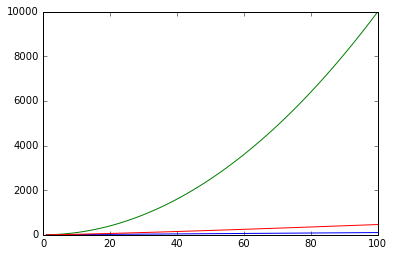

In [5]:
# function values
%matplotlib inline
import matplotlib.pylab as plt
import math

N = 100
x = []
y_1 = []
y_n2 = []
y_nlogn = []
for i in range(1, N+1):
    x.append(i)
    y_1.append(i)
    y_n2.append(i*i)
    y_nlogn.append(i*math.log(i))

plt.figure()
plt.plot(x, y_1)
plt.plot(x, y_n2)
plt.plot(x, y_nlogn)
plt.show()

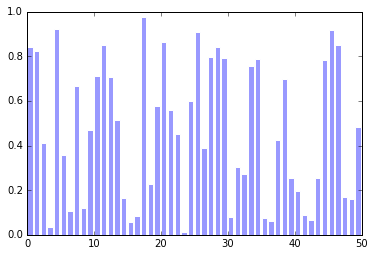

In [6]:
# array of random values
%matplotlib inline
import matplotlib.pylab as plt
import random
import math

N = 50
x = []
y = []
for i in range(N):
    x.append(i)
    y.append(random.random())
    
plt.figure()
plt.bar(x, y, facecolor='#9999ff', edgecolor='white')
plt.show()

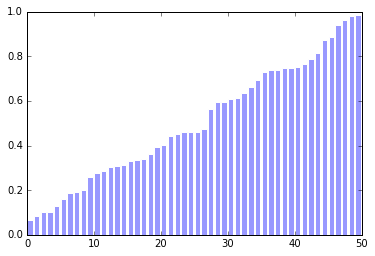

In [7]:
# sorted array of random values
%matplotlib inline
import matplotlib.pylab as plt
import random
import math

N = 50
x = []
y = []
for i in range(N):
    x.append(i)
    y.append(random.random())

y.sort()
    
plt.figure()
plt.bar(x, y, facecolor='#9999ff', edgecolor='white')
plt.show()

---

## 1.2 Data Abstraction

Below an example of data abstraction type Counter is implementated and two objects are declaired:

In [1]:
class Counter:
    def __init__(self, id):
        self.name = id
        self.count = 0
    def __str__(self):
        return str(self.count) + " " + self.name
    def increment(self):
        self.count += 1
    def tally(self):
        return self.count
    def reset(self):
        self.count = 0

heads = Counter("heads")
tails = Counter("tails")

This is a simple client code example:

In [2]:
heads.reset()
tails.reset()

heads.increment()
heads.increment()
tails.increment()

print(str(heads) + " " + str(tails))
print(heads.tally() + tails.tally())

2 heads 1 tails
3


The Flips example demos using objects.

In [3]:
# Flips
import random

T = 1000000
heads.reset()
tails.reset()
for t in range(T):
    if random.randint(0, 1):
        heads.increment()
    else:
        tails.increment()
print(str(heads))
print(str(tails))
d = heads.tally() - tails.tally()
print("Delta: " + str(abs(d)))

500429 heads
499571 tails
Delta: 858


The FlipsMax example demos using objects as arguments and return value.

In [4]:
# FlipsMax
import random

def counterMax(x, y):
    if x.tally() > y.tally(): return x
    else:                     return y

T = 1000000
heads.reset()
tails.reset()
for t in range(T):
    if random.randint(0, 1):
        heads.increment()
    else:
        tails.increment()

if heads.tally() == tails.tally():
    print("Tie")
else:
    print(str(counterMax(heads, tails)) + " wins")

500376 heads wins


The Rools example demos using array of objects.

In [5]:
# Rolls
import random

T = 1000000
SIDES = 6
rolls = []
for i in range(SIDES+1):
    rolls.append(Counter(str(i) + "'s"))

for t in range(T):
    result = random.randint(1, SIDES)
    rolls[result].increment()

for i in range(1, SIDES+1):
    print(str(rolls[i]))

167114 1's
166343 2's
166844 3's
166884 4's
166263 5's
166552 6's


More ADT implementations:

In [1]:
# Accumulator
import random

# Implementation
class Accumulator:
    def __init__(self):
        self.total = 0.0
        self.N = 0
    def addDataValue(self, val):
        self.total += val
        self.N += 1
    def mean(self):
        return self.total/self.N
    def __str__(self):
        return "Mean (" + str(self.N) + " values): " + "%7.5f" % (self.mean())


# Typical client
T = 1000
a = Accumulator()
for t in range(T):
    a.addDataValue(random.random())
print(a)

Mean (1000 values): 0.50976


Here's an extension for above Accumulator ADT that can visually plot the data info.

In [ ]:
# VisualAccumulator
import random
import matplotlib.pylab as plt

# Implementation
class VisualAccumulator:
    def __init__(self, trials, max):
        self.total = 0.0
        self.N = 0
        self.trials = trials
        plt.axis([0, trials, 0, max])
    def addDataValue(self, val):
        self.N += 1
        self.total += val
        plt.scatter(self.N, val, 20, 'b')
        plt.scatter(self.N, self.mean(), 20, 'r')
        if self.N == self.trials:
            plt.show()
    def mean(self):
        return self.total/self.N
    def __str__(self):
        return "Mean (" + str(self.N) + " values): " + "%7.5f" % (self.mean())

# Client
T = 100
a = VisualAccumulator(T, 1.0)
for t in range(T):
    a.addDataValue(random.random())
print(a)

---

Below is an ADT based method to implement the binary search.

In [7]:
# StaticSETofInts
import copy
import numpy as np

# Implementation
class StaticSETofInts:
    def __init__(self, keys):
        self.a = copy.deepcopy(keys)
        self.a.sort()
    def contains(self, key):
        if self.__rank__(key) != -1:
            return True
        else:
            return False
    def __rank__(self, key):
        # binary search
        lo = 0
        hi = len(self.a) - 1;
        while lo <= hi:
            mid = lo + (hi - lo)//2
            if   key < self.a[mid]: hi = mid - 1
            elif key > self.a[mid]: lo = mid + 1
            else             : return mid
        return -1

# Client
testdata  = (np.loadtxt("./tinyT.txt")).tolist()
whitelist = (np.loadtxt("./tinyW.txt")).tolist()
# print(testdata)
# print(whitelist)
set = StaticSETofInts(whitelist)
for key in testdata:
    if set.contains(key):
        print(str(key) + " is not in the whitelist.")

23.0 is not in the whitelist.
10.0 is not in the whitelist.
18.0 is not in the whitelist.
23.0 is not in the whitelist.
98.0 is not in the whitelist.
84.0 is not in the whitelist.
11.0 is not in the whitelist.
10.0 is not in the whitelist.
48.0 is not in the whitelist.
77.0 is not in the whitelist.
54.0 is not in the whitelist.
98.0 is not in the whitelist.
77.0 is not in the whitelist.
77.0 is not in the whitelist.
68.0 is not in the whitelist.
